<center>
    
<img src="Logo.png" alt="Descripción de la imagen" style="width:30%;">

    
#  **Jumpy Hoop**
    
    Autores: Silenced for anonymous reasons
    Institución: Silenced for anonymous reasons
    Correo: Silenced for anonymous reasons  

Todos los cálculos aquí presentados se encuentran inspirados en el modelo dado por  J. G. P. Berman en: **J. G. P. Berman and J. F. M. Izrailev, “The hopping hoop revisited,” The American Mathematical Monthly, vol. 106:7, pp. 609–617, 1999.**


## Librerias

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sympy as smp
from scipy.optimize import curve_fit
import math
from sympy import lambdify
#Si presenta problemas al correr el programa, comente las siguientes lineas:
plt.style.reload_library()
plt.style.use(['science','notebook'])
from itertools import combinations
print('done')

done


# Enunciado del problema:
    




Given enough angular momentum, a hoop with a mass attached to it may demonstrate a jumping motion when it is rolling. Explain the phenomenon and how it depends on the relevant parameters. Is it possible to reproduce this behavior with any unbalanced mass distribution on a wheel? What happens when one changes the profile of the ground? Can you add a mechanical contraption (that will not touch the ground) to the hoop to increase the maximal height of the jump?


# <center> Cálculo Fuerza Normal $f_N(\xi)$
## Indice
1. [Solucion](#1.-Solucion)
2. [Solución para $\lambda = 1$](#2.-Caso_Especial_1)
3. [Solución para $\lambda \neq 1$](#3.-Caso_Especial_2)
4. [Error Articulo](#Error)
5. [Calculos Númericos](#Calculos)


##  1.-Solucion
Recordando que la expresión que queremos hallar la expresión para la Fuerza Normal $f_N(\xi)$ y la Fuerza de Fricción $f_f(\xi)$, donde:

$$cos(\theta) = \xi$$

Sabemos que en el problema original, al realizar el análisis por Newton se obtiene:

$$
\begin{aligned}
& \ddot{x}(t)=f(t) \\
& \ddot{y}(t)=n(t)-g
\end{aligned}
$$

Por otro lado, cuando realizamos el análisis de la energía mecánica del sistema llegamos a:

$$
\frac{1}{2} M\left(\dot{x}^2+\dot{y}^2\right)+\frac{1}{2} I \dot{\theta}^2+M g y=M\left((1+\lambda)\left(\frac{1}{4} v_0^2+g R\right)+\frac{1}{8} v_0^2 \lambda \epsilon\right)
$$

Lo que permite despejar el termino de la derivada angular:
$$
\dot{\theta}(t)^2=\frac{g}{R} \frac{\left((1+\lambda+\lambda \epsilon / 2) c+2 \lambda \sin ^2(\theta(t) / 2)\right)}{1+\lambda \cos (\theta(t))+\lambda \epsilon / 2}
$$

Con esta información, ya podemos hallar la fuerza normal, asi que definimos las variables necesarias a través de símbolos, donde se tratará de hallar la solución simbolica al problema.

### Definición de Simbolos

In [211]:
g = smp.symbols('g')
R = smp.symbols('R')
epsilon = smp.symbols('epsilon')
lambda_1 = smp.symbols('lambda')
V_0 = smp.symbols('V_0')
theta = smp.symbols('theta')
#c = V_0**2/(4*g*R)
xi = smp.symbols('xi')
c = smp.symbols('c')
print('Done')

Done


### Cálculo de la Fuerza Normal
A continuación se presenta la solución de la fuerza normal de manera simbolica.

In [212]:
#Hacemos n(t) =g+a+b
a =- 2*lambda_1*g*smp.cos(theta)*(((1 + lambda_1 + lambda_1*epsilon/2) * c + 2 * lambda_1* smp.sin(theta/2)**2 )/(2 + 2*lambda_1*smp.cos(theta) + 2*lambda_1*epsilon/2))
a

-2*g*lambda*(c*(epsilon*lambda/2 + lambda + 1) + 2*lambda*sin(theta/2)**2)*cos(theta)/(epsilon*lambda + 2*lambda*cos(theta) + 2)

In [213]:
b= - 4 * R*lambda_1*g*lambda_1/(2*R) * ((smp.sin(theta)**2 * (1 + lambda_1*smp.cos(theta) + lambda_1*epsilon/2) + smp.sin(theta)**2 *((1 + lambda_1 + lambda_1*epsilon/2)*c + 2*lambda_1*smp.sin(theta/2)**2))/(2 + 2*lambda_1*smp.cos(theta) + 2*lambda_1*epsilon/2)**2)
b

-2*g*lambda**2*((c*(epsilon*lambda/2 + lambda + 1) + 2*lambda*sin(theta/2)**2)*sin(theta)**2 + (epsilon*lambda/2 + lambda*cos(theta) + 1)*sin(theta)**2)/(epsilon*lambda + 2*lambda*cos(theta) + 2)**2

In [214]:
n_t =g+a+b
n_t

-2*g*lambda**2*((c*(epsilon*lambda/2 + lambda + 1) + 2*lambda*sin(theta/2)**2)*sin(theta)**2 + (epsilon*lambda/2 + lambda*cos(theta) + 1)*sin(theta)**2)/(epsilon*lambda + 2*lambda*cos(theta) + 2)**2 - 2*g*lambda*(c*(epsilon*lambda/2 + lambda + 1) + 2*lambda*sin(theta/2)**2)*cos(theta)/(epsilon*lambda + 2*lambda*cos(theta) + 2) + g

**Hemos encontrado la expresión que estamos buscando**, sin embargo, esta expresión se encuentra escrita en terminos de funciones trigonometricas, realizando cambios de variables pertinentes, podemos colocar todo en terminos de $\xi$, recordando que 

$$\xi = cos(\theta) = $$



**Primer cambio de variable:**

$$ sin^2(\frac{\theta}{2})= \frac{1- cos(\theta)}{2} $$

In [215]:
n_t_cambiada = n_t.subs(smp.sin(theta/2)**2, (1 - smp.cos(theta))/2)  #Cambio de variable de la sustitución trigonometrica
n_t_cambiada

-2*g*lambda**2*((c*(epsilon*lambda/2 + lambda + 1) + 2*lambda*(1/2 - cos(theta)/2))*sin(theta)**2 + (epsilon*lambda/2 + lambda*cos(theta) + 1)*sin(theta)**2)/(epsilon*lambda + 2*lambda*cos(theta) + 2)**2 - 2*g*lambda*(c*(epsilon*lambda/2 + lambda + 1) + 2*lambda*(1/2 - cos(theta)/2))*cos(theta)/(epsilon*lambda + 2*lambda*cos(theta) + 2) + g

**Segundo cambio de variable:**

$$ sin^2 \theta = (1-cos^2\theta)$$

In [216]:
n_t_cambiada_2 = n_t_cambiada.subs(smp.sin(theta)**2, (1-smp.cos(theta)**2))
n_t_cambiada_2

-2*g*lambda**2*((1 - cos(theta)**2)*(c*(epsilon*lambda/2 + lambda + 1) + 2*lambda*(1/2 - cos(theta)/2)) + (1 - cos(theta)**2)*(epsilon*lambda/2 + lambda*cos(theta) + 1))/(epsilon*lambda + 2*lambda*cos(theta) + 2)**2 - 2*g*lambda*(c*(epsilon*lambda/2 + lambda + 1) + 2*lambda*(1/2 - cos(theta)/2))*cos(theta)/(epsilon*lambda + 2*lambda*cos(theta) + 2) + g

**Tercer y último cambio de variable:**

$$\xi = cos(\theta) = $$

In [217]:
n_t_final = n_t_cambiada_2.subs(smp.cos(theta),xi)
n_t_final

-2*g*lambda**2*((1 - xi**2)*(c*(epsilon*lambda/2 + lambda + 1) + 2*lambda*(1/2 - xi/2)) + (1 - xi**2)*(epsilon*lambda/2 + lambda*xi + 1))/(epsilon*lambda + 2*lambda*xi + 2)**2 - 2*g*lambda*xi*(c*(epsilon*lambda/2 + lambda + 1) + 2*lambda*(1/2 - xi/2))/(epsilon*lambda + 2*lambda*xi + 2) + g

In [218]:
n_t_factorizada = smp.simplify(n_t_final)
n_t_factorizada

g*(lambda**2*(xi**2 - 1)*(c*(epsilon*lambda + 2*lambda + 2) + epsilon*lambda + 2*lambda*xi - 2*lambda*(xi - 1) + 2) - lambda*xi*(c*(epsilon*lambda + 2*lambda + 2) - 2*lambda*(xi - 1))*(epsilon*lambda + 2*lambda*xi + 2) + (epsilon*lambda + 2*lambda*xi + 2)**2)/(epsilon*lambda + 2*lambda*xi + 2)**2

Ahora se define el polinomio $p(\xi))$, este polinomio se define tal

$$ n(\xi) = \frac{g}{(\epsilon \lambda + 2\epsilon \lambda + 2)^2} p(\xi) $$

Lo que nos permitirá calcular las soluciones de la ecuación $n(\xi)=0$ con mayor facilidad.

In [219]:
#Fefinimos el polinomio P:
P_eta = n_t_factorizada * ((2 + 2*lambda_1*xi + 2*lambda_1*epsilon/2)**2)/(g)
P_eta

lambda**2*(xi**2 - 1)*(c*(epsilon*lambda + 2*lambda + 2) + epsilon*lambda + 2*lambda*xi - 2*lambda*(xi - 1) + 2) - lambda*xi*(c*(epsilon*lambda + 2*lambda + 2) - 2*lambda*(xi - 1))*(epsilon*lambda + 2*lambda*xi + 2) + (epsilon*lambda + 2*lambda*xi + 2)**2

In [220]:
P_eta_expand = smp.expand(P_eta)
P_eta_expand

-c*epsilon**2*lambda**3*xi - c*epsilon*lambda**3*xi**2 - 2*c*epsilon*lambda**3*xi - c*epsilon*lambda**3 - 4*c*epsilon*lambda**2*xi - 2*c*lambda**3*xi**2 - 2*c*lambda**3 - 2*c*lambda**2*xi**2 - 4*c*lambda**2*xi - 2*c*lambda**2 - 4*c*lambda*xi + epsilon**2*lambda**2 + 3*epsilon*lambda**3*xi**2 - 2*epsilon*lambda**3*xi - epsilon*lambda**3 + 4*epsilon*lambda**2*xi + 4*epsilon*lambda + 4*lambda**3*xi**3 - 2*lambda**3*xi**2 - 2*lambda**3 + 10*lambda**2*xi**2 - 4*lambda**2*xi - 2*lambda**2 + 8*lambda*xi + 4

Podemos observar que si se des-comenta el siguiente código, se obtendrá una expresión largota que nos indica la solución general del problema, vemos que si tratamos de trabajar con esta expresión se vuelve tedioso el asunto.

Por esto, hemos decidido darle valores a $\lambda$ y graficar el comportamiento de esta fuerza normal en función de los parámetros internos que podamos cambiarle al problema.

In [221]:
#Solucionar polinomio
soluciones = smp.solve(P_eta,xi)
#soluciones

##  2.-Caso_Especial_1
Siguiendo la idea anteriormente mencionada, podemos reescribir toda la expresión anterior asignadole un valor a lambda arbitrario y sustituyendolo de manera simbólica las expresiones previamente cálculadas. 

Sin embargo, con la idea de tener predicciones comprobables en nuestros resultados haremos que $\lambda = 1$ que es cuando todo la masa del sistema se encuentra concentrada en la partícula atada al aro.

In [222]:
valor_lambda = 1

### Cálculos

A continuación se presenta el mismo proceso realizado previamente, solo que para el nuevo valor de $\lambda = 1$.

In [223]:
a =- 2*lambda_1*g*smp.cos(theta)*(((1 + lambda_1 + lambda_1*epsilon/2) * c + 2 * lambda_1* smp.sin(theta/2)**2 )/(2 + 2*lambda_1*smp.cos(theta) + 2*lambda_1*epsilon/2))
a_1 = a.subs([(lambda_1, valor_lambda)])


In [224]:
a_1

-2*g*(c*(epsilon/2 + 2) + 2*sin(theta/2)**2)*cos(theta)/(epsilon + 2*cos(theta) + 2)

In [225]:
b= - 4 * R*lambda_1*g*lambda_1/(2*R) * ((smp.sin(theta)**2 * (1 + lambda_1*smp.cos(theta) + lambda_1*epsilon/2) + smp.sin(theta)**2 *((1 + lambda_1 + lambda_1*epsilon/2)*c + 2*lambda_1*smp.sin(theta/2)**2))/(2 + 2*lambda_1*smp.cos(theta) + 2*lambda_1*epsilon/2)**2)
b_1 = b.subs([(lambda_1, valor_lambda)])


In [226]:
b_1

-2*g*((c*(epsilon/2 + 2) + 2*sin(theta/2)**2)*sin(theta)**2 + (epsilon/2 + cos(theta) + 1)*sin(theta)**2)/(epsilon + 2*cos(theta) + 2)**2

In [227]:
n_t =g+a_1+b_1
n_t

-2*g*(c*(epsilon/2 + 2) + 2*sin(theta/2)**2)*cos(theta)/(epsilon + 2*cos(theta) + 2) - 2*g*((c*(epsilon/2 + 2) + 2*sin(theta/2)**2)*sin(theta)**2 + (epsilon/2 + cos(theta) + 1)*sin(theta)**2)/(epsilon + 2*cos(theta) + 2)**2 + g

In [228]:
n_t_cambiada = n_t.subs(smp.sin(theta/2)**2, (1 - smp.cos(theta))/2)  #Cambio de variable de la sustitución trigonometrica
n_t_cambiada

-2*g*((epsilon/2 + cos(theta) + 1)*sin(theta)**2 + (c*(epsilon/2 + 2) - cos(theta) + 1)*sin(theta)**2)/(epsilon + 2*cos(theta) + 2)**2 + g - 2*g*(c*(epsilon/2 + 2) - cos(theta) + 1)*cos(theta)/(epsilon + 2*cos(theta) + 2)

In [229]:
n_t_cambiada_2 = n_t_cambiada.subs(smp.sin(theta)**2, (1-smp.cos(theta)**2))
n_t_cambiada_2

-2*g*((1 - cos(theta)**2)*(epsilon/2 + cos(theta) + 1) + (1 - cos(theta)**2)*(c*(epsilon/2 + 2) - cos(theta) + 1))/(epsilon + 2*cos(theta) + 2)**2 + g - 2*g*(c*(epsilon/2 + 2) - cos(theta) + 1)*cos(theta)/(epsilon + 2*cos(theta) + 2)

In [230]:
n_t_final = n_t_cambiada_2.subs(smp.cos(theta),xi)
n_t_final

-2*g*xi*(c*(epsilon/2 + 2) - xi + 1)/(epsilon + 2*xi + 2) - 2*g*((1 - xi**2)*(epsilon/2 + xi + 1) + (1 - xi**2)*(c*(epsilon/2 + 2) - xi + 1))/(epsilon + 2*xi + 2)**2 + g

In [231]:
n_t_factorizada = smp.simplify(n_t_final)
n_t_factorizada

g*(-xi*(epsilon + 2*xi + 2)*(c*(epsilon + 4) - 2*xi + 2) + (xi**2 - 1)*(c*(epsilon + 4) + epsilon + 4) + (epsilon + 2*xi + 2)**2)/(epsilon + 2*xi + 2)**2

In [232]:
#Ahora definimos el polinomio P:
P_eta = n_t_factorizada * ((2 + 2*valor_lambda*xi + 2*valor_lambda*epsilon/2)**2)/(g)
P_eta

-xi*(epsilon + 2*xi + 2)*(c*(epsilon + 4) - 2*xi + 2) + (xi**2 - 1)*(c*(epsilon + 4) + epsilon + 4) + (epsilon + 2*xi + 2)**2

In [233]:
P_eta_expand = smp.expand(P_eta)
P_eta_expand

-c*epsilon**2*xi - c*epsilon*xi**2 - 6*c*epsilon*xi - c*epsilon - 4*c*xi**2 - 8*c*xi - 4*c + epsilon**2 + 3*epsilon*xi**2 + 2*epsilon*xi + 3*epsilon + 4*xi**3 + 8*xi**2 + 4*xi

In [234]:
P_Eta_xi = smp.factor(P_eta_expand, xi)
P_Eta_xi

-c*epsilon - 4*c + epsilon**2 + 3*epsilon + 4*xi**3 + xi**2*(-c*epsilon - 4*c + 3*epsilon + 8) + xi*(-c*epsilon**2 - 6*c*epsilon - 8*c + 2*epsilon + 4)

### Gráfica
En base a los resultados anteriormente encontrados, podemos darles valores a las variables simbolicas utilizadas y graficar la expresión encontrada para ver como se comporta a través de la modificación de parametros relevantes en el sistema.

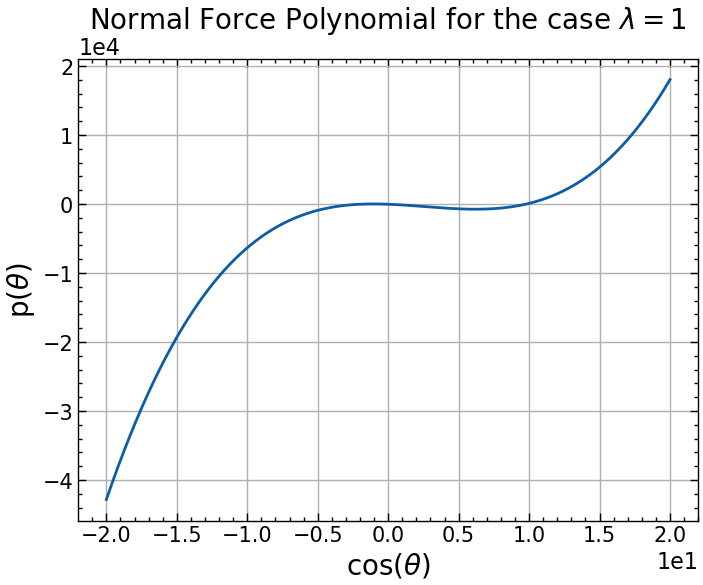

In [239]:
#Asignación de valores:

valor_a = 9.8   # Fuerza de gravedad
valor_b = 0.6   #Radio
valor_c = 0.1     #Epsilon[0,1]
velocidad = 15  #Velocidad inicial
valor_d = (velocidad**2)/(4*valor_b*valor_a)


#Sustitución en el polinomio de dichos valores

polinomio_Eta_xi_1 = P_Eta_xi.subs([ (epsilon, valor_c), (c, valor_d)])

#Convertimos este polinomio en una función

polinomio_Eta_xi_2 = lambdify(xi, polinomio_Eta_xi_1, modules='numpy')

#Creamos el linspace de trabajo

x_vals = np.linspace(-20, 20, 40000)  

#Evaluamos la función en dicho linspace.

y_vals = polinomio_Eta_xi_2(x_vals)








# Grafica el polinomio
plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals)
plt.xlabel(r'$\cos(\theta)$', fontsize = 20)
plt.ylabel(r'p($\theta$)', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Normal Force Polynomial for the case $\lambda = 1$', fontsize = 20)
plt.grid(True)
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.savefig("Grafica_1.png", dpi=500)
plt.show()

##  3.-Caso_Especial_2
Siguiendo la idea anteriormente mencionada, podemos reescribir toda la expresión anterior asignadole un valor a lambda arbitrario y sustituyendolo de manera simbolica a las expresiones previamente calculadas. Sin embargo, con la idea de tener predicciones realistas en nuestros resultados haremos que $\lambda = 0.4$ que es similar a la configuración experimental construida


In [27]:
valor_lambda = 0.4

### Cálculos

A continuación se presenta el mismo proceso realizado previamente, solo que para el nuevo valor de $\lambda = 0.4$.

In [28]:
a =- 2*lambda_1*g*smp.cos(theta)*(((1 + lambda_1 + lambda_1*epsilon/2) * c + 2 * lambda_1* smp.sin(theta/2)**2 )/(2 + 2*lambda_1*smp.cos(theta) + 2*lambda_1*epsilon/2))
a_2 = a.subs([(lambda_1, valor_lambda)])

In [29]:
a_2

-0.8*g*(c*(0.2*epsilon + 1.4) + 0.8*sin(theta/2)**2)*cos(theta)/(0.4*epsilon + 0.8*cos(theta) + 2)

In [30]:
b= - 4 * R*lambda_1*g*lambda_1/(2*R) * ((smp.sin(theta)**2 * (1 + lambda_1*smp.cos(theta) + lambda_1*epsilon/2) + smp.sin(theta)**2 *((1 + lambda_1 + lambda_1*epsilon/2)*c + 2*lambda_1*smp.sin(theta/2)**2))/(2 + 2*lambda_1*smp.cos(theta) + 2*lambda_1*epsilon/2)**2)
b_2 = b.subs([(lambda_1, valor_lambda)])


In [31]:
b_2

-0.08*g*((c*(0.2*epsilon + 1.4) + 0.8*sin(theta/2)**2)*sin(theta)**2 + (0.2*epsilon + 0.4*cos(theta) + 1)*sin(theta)**2)/(0.2*epsilon + 0.4*cos(theta) + 1)**2

In [32]:
n_t =g+a_2+b_2
n_t

-0.8*g*(c*(0.2*epsilon + 1.4) + 0.8*sin(theta/2)**2)*cos(theta)/(0.4*epsilon + 0.8*cos(theta) + 2) - 0.08*g*((c*(0.2*epsilon + 1.4) + 0.8*sin(theta/2)**2)*sin(theta)**2 + (0.2*epsilon + 0.4*cos(theta) + 1)*sin(theta)**2)/(0.2*epsilon + 0.4*cos(theta) + 1)**2 + g

In [33]:
n_t_cambiada = n_t.subs(smp.sin(theta/2)**2, (1 - smp.cos(theta))/2)  #Cambio de variable de la sustitución trigonometrica
n_t_cambiada

-0.08*g*((0.2*epsilon + 0.4*cos(theta) + 1)*sin(theta)**2 + (c*(0.2*epsilon + 1.4) - 0.4*cos(theta) + 0.4)*sin(theta)**2)/(0.2*epsilon + 0.4*cos(theta) + 1)**2 + g - 0.8*g*(c*(0.2*epsilon + 1.4) - 0.4*cos(theta) + 0.4)*cos(theta)/(0.4*epsilon + 0.8*cos(theta) + 2)

In [34]:
n_t_cambiada_2 = n_t_cambiada.subs(smp.sin(theta)**2, (1-smp.cos(theta)**2))
n_t_cambiada_2

-0.08*g*((1 - cos(theta)**2)*(0.2*epsilon + 0.4*cos(theta) + 1) + (1 - cos(theta)**2)*(c*(0.2*epsilon + 1.4) - 0.4*cos(theta) + 0.4))/(0.2*epsilon + 0.4*cos(theta) + 1)**2 + g - 0.8*g*(c*(0.2*epsilon + 1.4) - 0.4*cos(theta) + 0.4)*cos(theta)/(0.4*epsilon + 0.8*cos(theta) + 2)

In [35]:
n_t_final = n_t_cambiada_2.subs(smp.cos(theta),xi)
n_t_final

-0.8*g*xi*(c*(0.2*epsilon + 1.4) - 0.4*xi + 0.4)/(0.4*epsilon + 0.8*xi + 2) - 0.08*g*((1 - xi**2)*(0.2*epsilon + 0.4*xi + 1) + (1 - xi**2)*(c*(0.2*epsilon + 1.4) - 0.4*xi + 0.4))/(0.2*epsilon + 0.4*xi + 1)**2 + g

In [36]:
n_t_factorizada = smp.simplify(n_t_final)
n_t_factorizada

g*(-0.8*xi*(0.2*epsilon + 0.4*xi + 1)**2*(c*(0.2*epsilon + 1.4) - 0.4*xi + 0.4) + 0.08*(xi**2 - 1)*(0.4*epsilon + 0.8*xi + 2)*(c*(0.2*epsilon + 1.4) + 0.2*epsilon + 1.4) + (0.2*epsilon + 0.4*xi + 1)**2*(0.4*epsilon + 0.8*xi + 2))/((0.2*epsilon + 0.4*xi + 1)**2*(0.4*epsilon + 0.8*xi + 2))

In [37]:
#Ahora definimos el polinomio P:

P_eta = n_t_factorizada * ((2 + 2*1*xi + 2*1*epsilon/2)**2)/(g)
P_eta

(epsilon + 2*xi + 2)**2*(-0.8*xi*(0.2*epsilon + 0.4*xi + 1)**2*(c*(0.2*epsilon + 1.4) - 0.4*xi + 0.4) + 0.08*(xi**2 - 1)*(0.4*epsilon + 0.8*xi + 2)*(c*(0.2*epsilon + 1.4) + 0.2*epsilon + 1.4) + (0.2*epsilon + 0.4*xi + 1)**2*(0.4*epsilon + 0.8*xi + 2))/((0.2*epsilon + 0.4*xi + 1)**2*(0.4*epsilon + 0.8*xi + 2))

In [38]:
P_eta_expand = smp.expand(P_eta)
P_eta_expand

-0.0064*c*epsilon**5*xi/(0.016*epsilon**3 + 0.096*epsilon**2*xi + 0.24*epsilon**2 + 0.192*epsilon*xi**2 + 0.96*epsilon*xi + 1.2*epsilon + 0.128*xi**3 + 0.96*xi**2 + 2.4*xi + 2) - 0.0448*c*epsilon**4*xi**2/(0.016*epsilon**3 + 0.096*epsilon**2*xi + 0.24*epsilon**2 + 0.192*epsilon*xi**2 + 0.96*epsilon*xi + 1.2*epsilon + 0.128*xi**3 + 0.96*xi**2 + 2.4*xi + 2) - 0.1344*c*epsilon**4*xi/(0.016*epsilon**3 + 0.096*epsilon**2*xi + 0.24*epsilon**2 + 0.192*epsilon*xi**2 + 0.96*epsilon*xi + 1.2*epsilon + 0.128*xi**3 + 0.96*xi**2 + 2.4*xi + 2) - 0.0064*c*epsilon**4/(0.016*epsilon**3 + 0.096*epsilon**2*xi + 0.24*epsilon**2 + 0.192*epsilon*xi**2 + 0.96*epsilon*xi + 1.2*epsilon + 0.128*xi**3 + 0.96*xi**2 + 2.4*xi + 2) - 0.1152*c*epsilon**3*xi**3/(0.016*epsilon**3 + 0.096*epsilon**2*xi + 0.24*epsilon**2 + 0.192*epsilon*xi**2 + 0.96*epsilon*xi + 1.2*epsilon + 0.128*xi**3 + 0.96*xi**2 + 2.4*xi + 2) - 0.7936*c*epsilon**3*xi**2/(0.016*epsilon**3 + 0.096*epsilon**2*xi + 0.24*epsilon**2 + 0.192*epsilon*xi**2 

In [39]:
#Factorizando, respecto a xi
P_Eta_xi = smp.factor(P_eta_expand, xi)
P_Eta_xi


14.0096*(-0.000228414801279123*c*epsilon**4 - 0.00365463682046597*c*epsilon**3 - 0.0198720877112837*c*epsilon**2 - 0.0429419826404751*c*epsilon - 0.0319780721790772*c + 0.000571037003197807*epsilon**5 + 0.0106212882594792*epsilon**4 + 0.0757195066240292*epsilon**3 + 0.257080858839653*epsilon**2 + 0.413887619917771*epsilon + 0.00730927364093193*xi**6 + xi**5*(-0.00182731841023298*c*epsilon - 0.0127912288716309*c + 0.0164458656920969*epsilon + 0.0749200548195523) + xi**4*(-0.00456829602558246*c*epsilon**2 - 0.0493375970762905*c*epsilon - 0.121516674280493*c + 0.0137048880767474*epsilon**2 + 0.135221562357241*epsilon + 0.306075833714025) + xi**3*(-0.00411146642302421*c*epsilon**3 - 0.0589310187300137*c*epsilon**2 - 0.264961169483783*c*epsilon - 0.377341251713111*c + 0.0050251256281407*epsilon**3 + 0.0909090909090909*epsilon**2 + 0.463225216994061*epsilon + 0.700776610324349) + xi**2*(-0.00159890360895386*c*epsilon**4 - 0.0283234353586112*c*epsilon**3 - 0.180219278209228*c*epsilon**2 - 0.4

### Gráfica
En base a los resultados anteriormente encontrados, podemos darles valores a las variables simbolicas utilizadas y graficar la expresión encontrada para ver como se comporta a través de la modificación de parametros relevantes en el sistema.

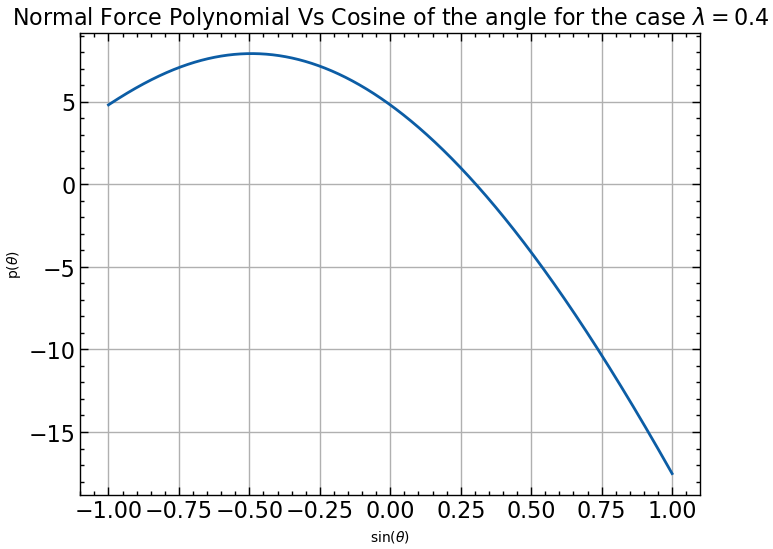

In [40]:
#Asignación de valores:
valor_a = 9.8   # Fuerza de gravedad
valor_b = 0.6   #Radio
valor_c = 1     #Epsilon[0,1]
velocidad = 10  #Velocidad inicial
valor_d = (velocidad**2)/(4*valor_b*valor_a)


#Sustitución en el polinomio de dichos valores

polinomio_Eta_xi_1 = P_Eta_xi.subs([(g, valor_a), (R, valor_b), (epsilon, valor_c), (c, valor_d)])

#Convertimos este polinomio en una función

polinomio_Eta_xi_2 = lambdify(xi, polinomio_Eta_xi_1, modules='numpy')

#Creamos el linspace de trabajo

x_vals = np.linspace(-1, 1, 40000)  

#Evaluamos la función en dicho linspace.

y_vals = polinomio_Eta_xi_2(x_vals)

# Grafica el polinomio
plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals)
plt.xlabel(r'$\sin(\theta)$')
plt.ylabel(r'p($\theta$)')
plt.title('Normal Force Polynomial Vs Cosine of the angle for the case $\lambda = 0.4$')
plt.grid(True)
plt.savefig("Grafica_1_1.png", dpi=500)
plt.show()

## Error
A continuación se presenta en esta pequeña sección que los cálculos obtenidos en el paper son incorrectos, debido a que el autor confunde dos términos, específicamente confunda que $\xi = \epsilon$, lo que hace que abarque un termino que no debería aparecer.


In [41]:
#Colocando Lambda = 1
#lambda_1 = 1
P_eta_expand

-0.0064*c*epsilon**5*xi/(0.016*epsilon**3 + 0.096*epsilon**2*xi + 0.24*epsilon**2 + 0.192*epsilon*xi**2 + 0.96*epsilon*xi + 1.2*epsilon + 0.128*xi**3 + 0.96*xi**2 + 2.4*xi + 2) - 0.0448*c*epsilon**4*xi**2/(0.016*epsilon**3 + 0.096*epsilon**2*xi + 0.24*epsilon**2 + 0.192*epsilon*xi**2 + 0.96*epsilon*xi + 1.2*epsilon + 0.128*xi**3 + 0.96*xi**2 + 2.4*xi + 2) - 0.1344*c*epsilon**4*xi/(0.016*epsilon**3 + 0.096*epsilon**2*xi + 0.24*epsilon**2 + 0.192*epsilon*xi**2 + 0.96*epsilon*xi + 1.2*epsilon + 0.128*xi**3 + 0.96*xi**2 + 2.4*xi + 2) - 0.0064*c*epsilon**4/(0.016*epsilon**3 + 0.096*epsilon**2*xi + 0.24*epsilon**2 + 0.192*epsilon*xi**2 + 0.96*epsilon*xi + 1.2*epsilon + 0.128*xi**3 + 0.96*xi**2 + 2.4*xi + 2) - 0.1152*c*epsilon**3*xi**3/(0.016*epsilon**3 + 0.096*epsilon**2*xi + 0.24*epsilon**2 + 0.192*epsilon*xi**2 + 0.96*epsilon*xi + 1.2*epsilon + 0.128*xi**3 + 0.96*xi**2 + 2.4*xi + 2) - 0.7936*c*epsilon**3*xi**2/(0.016*epsilon**3 + 0.096*epsilon**2*xi + 0.24*epsilon**2 + 0.192*epsilon*xi**2 

Escribimos el polinomio dado el autor:

In [42]:
p_com = (1- c*lambda_1*epsilon)*lambda_1**2 *epsilon**2 -epsilon*lambda_1*((c*xi**2 + 2*c*xi + 2*xi + c - 3*xi**2 + 1 )*lambda_1**2 + 4*(c-1)*xi*lambda_1 - 4) - 2*((c*xi**2 + xi**2 +c -2*xi**3 +1)*lambda_1**3 + (c*xi**2 + 2*c*xi +2*xi + c -5*xi**2 + 1)*lambda_1**2 +2*(c-2)*xi*lambda_1 - 2)

In [43]:
p_com

epsilon**2*lambda**2*(-c*epsilon*lambda + 1) - epsilon*lambda*(lambda**2*(c*xi**2 + 2*c*xi + c - 3*xi**2 + 2*xi + 1) + lambda*xi*(4*c - 4) - 4) - 2*lambda**3*(c*xi**2 + c - 2*xi**3 + xi**2 + 1) - 2*lambda**2*(c*xi**2 + 2*c*xi + c - 5*xi**2 + 2*xi + 1) - 2*lambda*xi*(2*c - 4) + 4

Lo expandimos:

In [44]:
P_com_expand = smp.expand(p_com)
P_com_expand

-c*epsilon**3*lambda**3 - c*epsilon*lambda**3*xi**2 - 2*c*epsilon*lambda**3*xi - c*epsilon*lambda**3 - 4*c*epsilon*lambda**2*xi - 2*c*lambda**3*xi**2 - 2*c*lambda**3 - 2*c*lambda**2*xi**2 - 4*c*lambda**2*xi - 2*c*lambda**2 - 4*c*lambda*xi + epsilon**2*lambda**2 + 3*epsilon*lambda**3*xi**2 - 2*epsilon*lambda**3*xi - epsilon*lambda**3 + 4*epsilon*lambda**2*xi + 4*epsilon*lambda + 4*lambda**3*xi**3 - 2*lambda**3*xi**2 - 2*lambda**3 + 10*lambda**2*xi**2 - 4*lambda**2*xi - 2*lambda**2 + 8*lambda*xi + 4

Restamos el polinomio del autor con el polinomio que hemos obtenido nosotros, podemos comprobar que difiere por un término, dicho termino es $tal$ que es cuando el autor se ha confundido. 

In [45]:
#Demostración equivocación autor.
-P_com_expand +P_eta_expand

-0.0064*c*epsilon**5*xi/(0.016*epsilon**3 + 0.096*epsilon**2*xi + 0.24*epsilon**2 + 0.192*epsilon*xi**2 + 0.96*epsilon*xi + 1.2*epsilon + 0.128*xi**3 + 0.96*xi**2 + 2.4*xi + 2) - 0.0448*c*epsilon**4*xi**2/(0.016*epsilon**3 + 0.096*epsilon**2*xi + 0.24*epsilon**2 + 0.192*epsilon*xi**2 + 0.96*epsilon*xi + 1.2*epsilon + 0.128*xi**3 + 0.96*xi**2 + 2.4*xi + 2) - 0.1344*c*epsilon**4*xi/(0.016*epsilon**3 + 0.096*epsilon**2*xi + 0.24*epsilon**2 + 0.192*epsilon*xi**2 + 0.96*epsilon*xi + 1.2*epsilon + 0.128*xi**3 + 0.96*xi**2 + 2.4*xi + 2) - 0.0064*c*epsilon**4/(0.016*epsilon**3 + 0.096*epsilon**2*xi + 0.24*epsilon**2 + 0.192*epsilon*xi**2 + 0.96*epsilon*xi + 1.2*epsilon + 0.128*xi**3 + 0.96*xi**2 + 2.4*xi + 2) + c*epsilon**3*lambda**3 - 0.1152*c*epsilon**3*xi**3/(0.016*epsilon**3 + 0.096*epsilon**2*xi + 0.24*epsilon**2 + 0.192*epsilon*xi**2 + 0.96*epsilon*xi + 1.2*epsilon + 0.128*xi**3 + 0.96*xi**2 + 2.4*xi + 2) - 0.7936*c*epsilon**3*xi**2/(0.016*epsilon**3 + 0.096*epsilon**2*xi + 0.24*epsilon*

## Calculos
En esta sección se presentan los cálculos realizado por el compañero Martin Montaño, los cuales son una solución númerica a los ángulos previamente mostrados en la grafica. La grafica nos permite visualizar y confirmar que ahí tenemos una solución, sin embargo, no nos da el valor explícito de esta solución

# <center> Cálculo Fuerza de Fricción $f_f(\xi)$
## Indice
1. [Solucion](#1.-Solucion)
2. [Solución para $\lambda = 1$](#2.-Series)
3. [Solución para $\lambda \neq 1$](#3-Gráficos)
4. [Error](#4.-Error)
    

In [243]:
#Ahora calcularemos el polinomio de la fricción.


#Primero lo definiremos


q =2*epsilon* lambda_1**2 +(2*lambda_1 -3 * epsilon*lambda_1 + c*(epsilon*lambda_1 + 2*lambda_1 +2) -6)*xi*lambda_1 +2*lambda_1 - epsilon*lambda_1 + c*(epsilon**2*lambda_1**2 + 2*epsilon*lambda_1**2 + 3*epsilon*lambda_1 + 2*lambda_1 +2) - 4*lambda_1**2 * xi**2 - 2
q

c*(epsilon**2*lambda**2 + 2*epsilon*lambda**2 + 3*epsilon*lambda + 2*lambda + 2) + 2*epsilon*lambda**2 - epsilon*lambda - 4*lambda**2*xi**2 + lambda*xi*(c*(epsilon*lambda + 2*lambda + 2) - 3*epsilon*lambda + 2*lambda - 6) + 2*lambda - 2

In [244]:
valor_lambda = 1
q_1 = q.subs([(lambda_1, valor_lambda)])

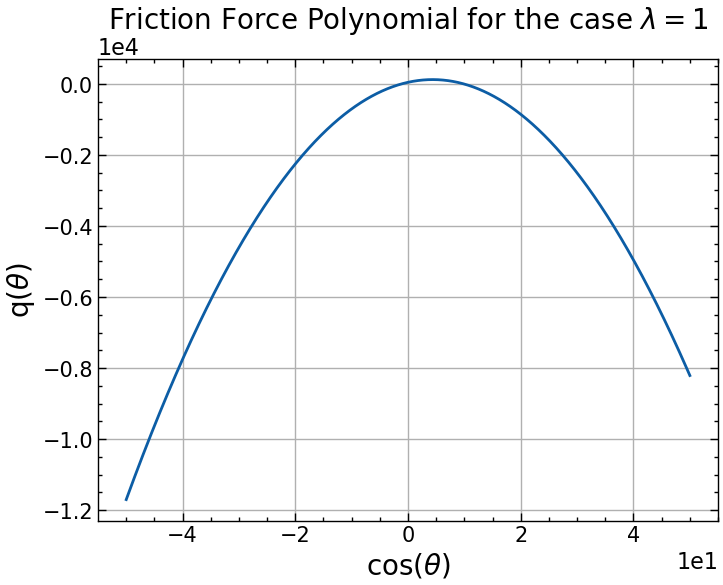

In [245]:
#Grafica
from sympy import lambdify

g = smp.symbols('g')
R = smp.symbols('R')
epsilon = smp.symbols('epsilon')
lambda_1 = smp.symbols('lambda')
V_0 = smp.symbols('V_0')
theta = smp.symbols('theta')
c = smp.symbols('c')

xi = smp.symbols('xi')



valor_a = 9.8   # Fuerza de gravedad
valor_b = 0.6   #Radio

valor_c = 0.1     #Epsilon[0,1]



velocidad = 15  #Velocidad inicial



valor_d = (velocidad**2)/(4*valor_b*valor_a)




q_2 = q_1.subs([ (epsilon, valor_c), (c, valor_d)])


q_3 = lambdify(xi, q_2, modules='numpy')

x_vals = np.linspace(-50, 50, 40000)  

y_vals = q_3(x_vals)


# Grafica el polinomio



# Grafica el polinomio
plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals)
plt.xlabel(r'$\cos(\theta)$', fontsize = 20)
plt.ylabel(r'q($\theta$)', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Friction Force Polynomial for the case $\lambda = 1$', fontsize = 20)
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))

plt.grid(True)
plt.savefig("Grafica_2.png", dpi=500)
plt.show()

# Movimiento del Trochoide.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math
plt.style.reload_library()
plt.style.use(['science','notebook'])
from itertools import combinations
print('done')

done


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.constants import g

In [17]:
def f(theta, t, v0,R,l, epsilon):
    c = v0**2 / (4*g*R)
    dtheta_dt_2 = (g/R) * (((1 + l + l*epsilon/2)*c) + 2*l*np.sin(theta/2)**2) / (1 + l*np.cos(theta) + l*epsilon/2)
    return np.sqrt(dtheta_dt_2)

In [34]:
R = 5
v0 = 0.5
l = 4/5
epsilon = 0.1

t = np.linspace(0, 5, 1000)
sol = odeint(f, 0, t, args=(R, v0, l, epsilon)).T

In [35]:
theta = sol[0]

def trochoid(R, theta, l):
    x = R*(theta + l*np.sin(theta))
    y = R*(1 + l*np.cos(theta))
    return x,y

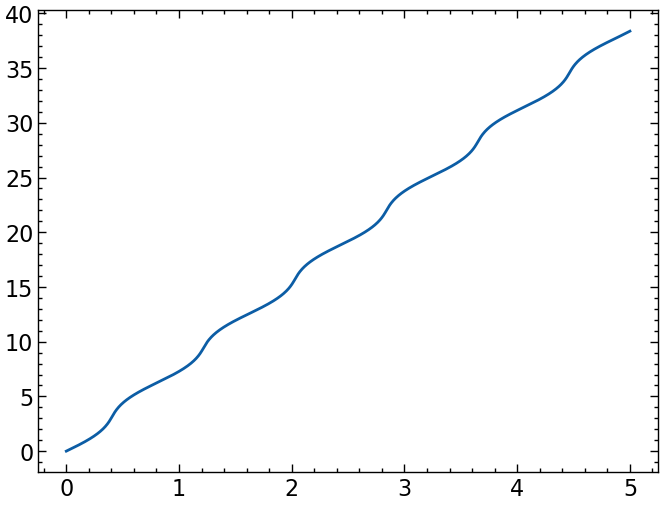

In [36]:
plt.plot(t, theta)

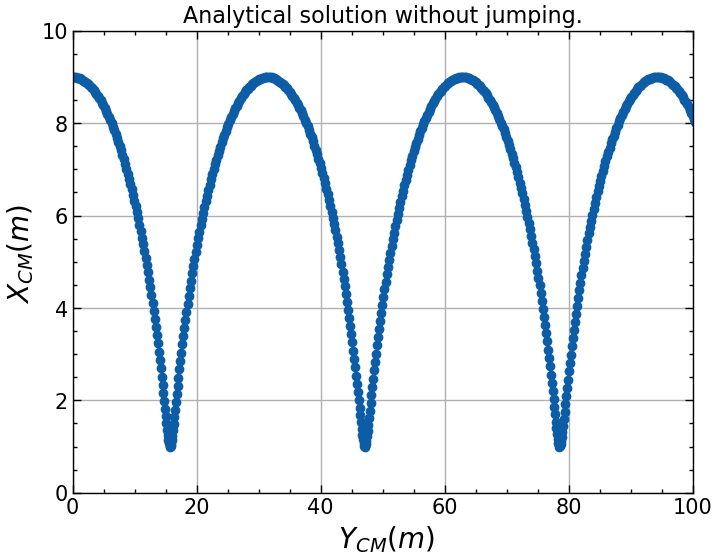

In [175]:
x,y = trochoid(R, theta, l)

plt.plot(x,y,'o')
plt.title('Analytical solution without jumping.')
plt.ylim(0,10)
plt.xlim(0,100)

plt.xlabel(r' $Y_{CM}(m)$', fontsize = 20)
plt.ylabel(r'  $X_{CM}(m)$', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.grid(True)

#plt.ylim(0,1.8)
#plt.ylim(0,1.8)

plt.savefig('X_and_Y_component_analytical.png', dpi=1000) 
plt.show()




# Graficar Datos Tracker

In [39]:
import pandas as pd


In [40]:
Arr = pd.read_excel("Jumpy.xlsx",  sheet_name=None) #Posiblemente aquí te dará error xd. Creo que en tu pc el archivo se llama Datos2, cambiale el nombre aquí de 3 a 2, o al archivo excel de tu pc de 2 a 3. Como te parezca

In [41]:
t1 = Arr['Fourth']


## Posición en X versus Tiempo

In [42]:
t1

,t,x,y
0,0.033,-2.224,0.472
1,0.033,-2.224,0.472
2,0.067,-2.195,0.478
3,0.100,-2.172,0.478
4,0.133,-2.141,0.484
...,...,...,...
326,10.999,3.457,0.198
327,11.032,3.459,0.196
328,11.065,3.478,0.186
329,11.099,3.480,0.184


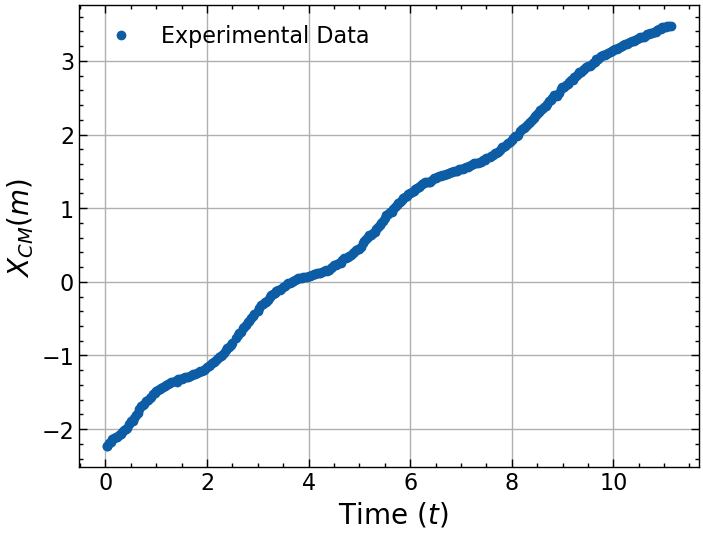

In [43]:
plt.plot(t1["t"], t1["x"], 'o', label="Experimental Data")
plt.grid(True)
plt.xlabel(r' Time $(t)$', fontsize = 20)
plt.ylabel(r'  $X_{CM}(m)$', fontsize = 20)
plt.legend()
plt.show()


In [44]:
t_real = 0.12*t1["t"]
t_real

0      0.00396
1      0.00396
2      0.00804
3      0.01200
4      0.01596
        ...   
326    1.31988
327    1.32384
328    1.32780
329    1.33188
330    1.33584
Name: t, Length: 331, dtype: float64

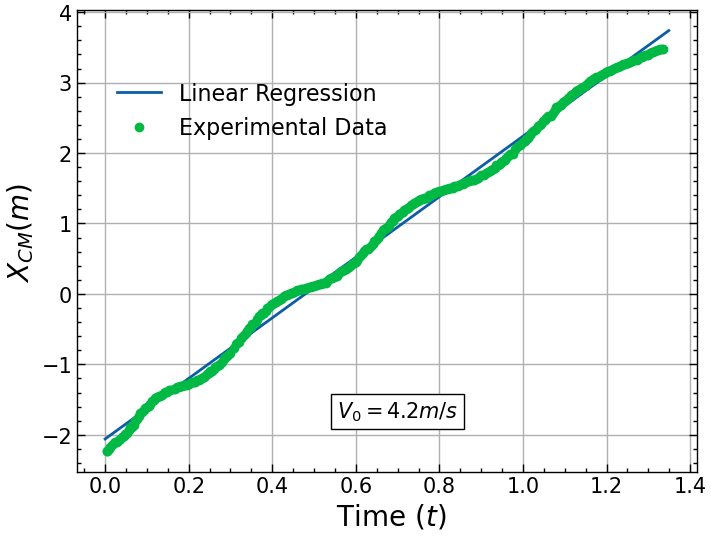

In [55]:
#Ahora empezamos el proceso de linealización de los datos

def lin(x, a, b):
    return a*x +b

x= np.arange(0, 1.35, 0.001)


res1, cov1 = curve_fit(lin, t_real, t1["x"])

fig= plt.figure()
textstr1 = '$V_0 = 4.2 m/s $'

plt.plot(x, lin(x, res1[0], res1[1]), '-', label = 'Linear Regression')
plt.plot(t_real, t1["x"], 'o', label="Experimental Data")
plt.title('', fontsize = 20)
plt.text(0.45,0.2,textstr1, transform=fig.transFigure, bbox=dict(facecolor='white', edgecolor='black'), fontsize= 15)

plt.xlabel(r' Time $(t)$', fontsize = 20)
plt.ylabel(r'  $X_{CM}(m)$', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(loc=(0.05, 0.7))
plt.grid(True)

#plt.ylim(0,1.8)
#plt.ylim(0,1.8)

plt.savefig('X_component.png', dpi=1000) 
plt.show()

In [50]:
a_1= [res1[0]]
a_1

[4.297677996238053]

## Posición en X versus Posición en Y

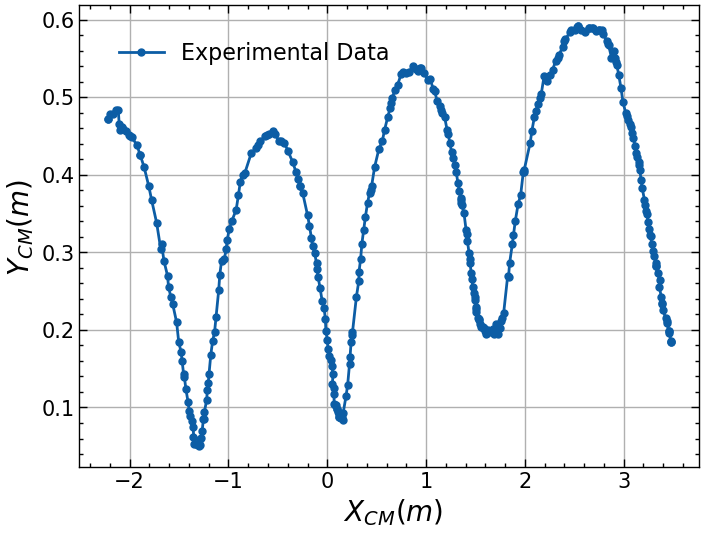

In [172]:
plt.plot(t1["x"], t1["y"], '-o', label="Experimental Data", markersize = 5)
plt.xlabel(r' $X_{CM}(m)$', fontsize = 20)
plt.ylabel(r'  $Y_{CM}(m)$', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.grid(True)
plt.legend(loc = (0.05,0.85))

#plt.ylim(0,1.8)
#plt.ylim(0,1.8)

plt.savefig('X_and_Y_component.png', dpi=1000) 
plt.show()

## Datos del primer disco - Centro de masa

In [207]:
Arr = pd.read_excel("Jumpy.xlsx",  sheet_name=None) #Posiblemente aquí te dará error xd. Creo que en tu pc el archivo se llama Datos2, cambiale el nombre aquí de 3 a 2, o al archivo excel de tu pc de 2 a 3. Como te parezca

In [72]:
t2 = Arr['TresCM']
t2

,t,x,y
0,0.000,-0.218,0.26500
1,0.033,-0.214,0.26200
2,0.100,-0.212,0.25900
3,0.167,-0.199,0.25800
4,0.233,-0.184,0.25300
...,...,...,...
173,5.999,3.222,0.09788
174,6.033,3.223,0.09685
175,6.066,3.229,0.09788
176,6.099,3.250,0.09479


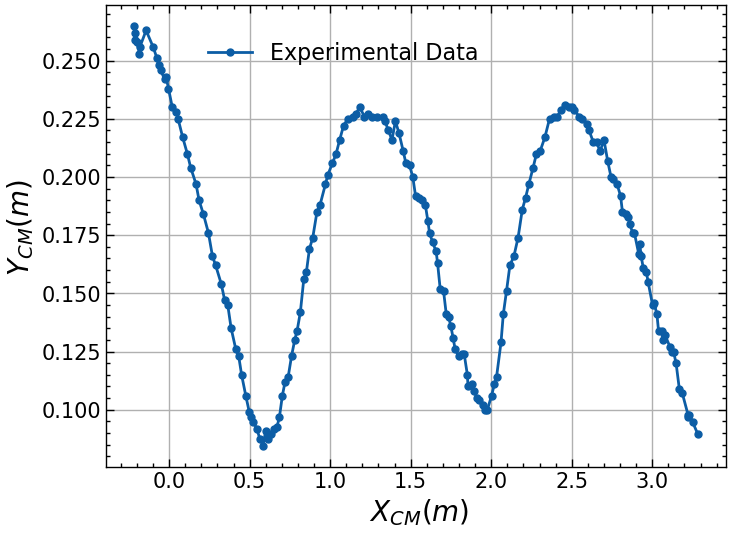

In [199]:
plt.plot(t2["x"], t2["y"], '-o', label="Experimental Data", markersize = 5)
plt.xlabel(r' $X_{CM}(m)$', fontsize = 20)
plt.ylabel(r'  $Y_{CM}(m)$', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.grid(True)
plt.legend(loc = (0.15,0.85))

#plt.ylim(0,1.8)
#plt.ylim(0,1.8)

plt.savefig('X_and_Y_component33333.png', dpi=1000) 
plt.show()

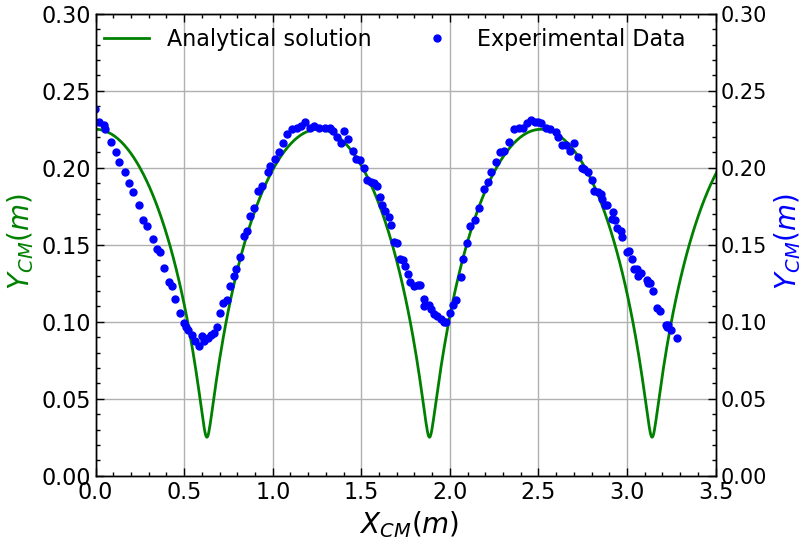

In [177]:
x1 = x/25
y1 = y/40


fig, ax1 = plt.subplots(figsize=(8, 6))


ax1.plot(x1,y1,'-', label="Analytical solution", color='green')
ax1.legend()

# Configurar el segundo eje y
ax2 = ax1.twinx()

# Graficar datos experimentales en el segundo eje y
ax2.plot(t2["x"], t2["y"], 'o', label="Experimental Data", color='blue', markersize = 5)


# Agregar etiquetas y leyenda si es necesario
#ax1.set_xlabel("Eje X")
ax1.set_ylabel(r' $Y_{CM}(m)$', color='Green', fontsize = 20)
ax2.set_ylabel(r' $Y_{CM}(m)$', color='blue', fontsize = 20)

ax1.legend(loc = (0,0.9))
ax2.legend(loc = (0.5,0.9))

ax1.set_xlabel(r' $X_{CM}(m)$', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
ax1.grid(True)


#plt.title('Analytical solution without jumping.')
ax1.set_ylim(0,0.3)
ax2.set_ylim(0,0.3)
plt.xlim(0,3.5)
plt.savefig('X_and_Y_component_experimental.png', dpi=1000) 
plt.show()

## Datos de nuevo Ultimo experimento

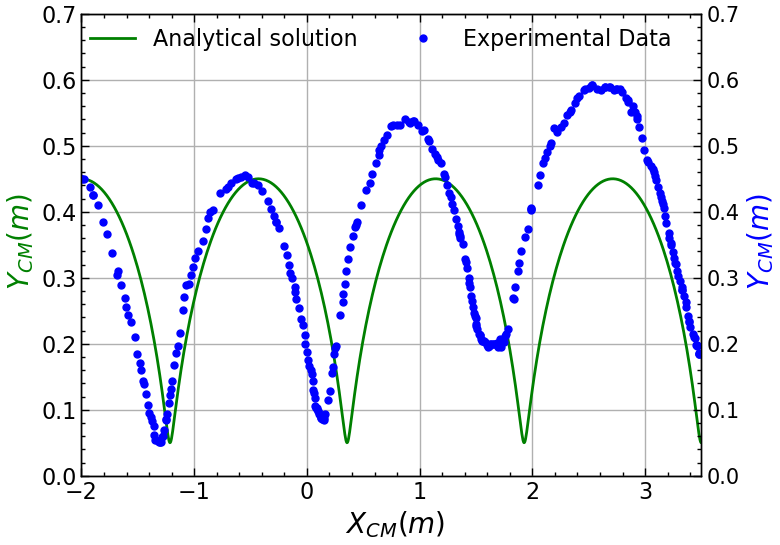

In [197]:
x1 = -2 + x/20
y1 = y/20


fig, ax1 = plt.subplots(figsize=(8, 6))


ax1.plot(x1,y1,'-', label="Analytical solution", color='green')
ax1.legend()

# Configurar el segundo eje y
ax2 = ax1.twinx()

# Graficar datos experimentales en el segundo eje y
ax2.plot(t1["x"], t1["y"], 'o', label="Experimental Data", color='blue', markersize = 5)


# Agregar etiquetas y leyenda si es necesario
#ax1.set_xlabel("Eje X")
ax1.set_ylabel(r' $Y_{CM}(m)$', color='Green', fontsize = 20)
ax2.set_ylabel(r' $Y_{CM}(m)$', color='blue', fontsize = 20)

ax1.legend(loc = (0,0.9))
ax2.legend(loc = (0.5,0.9))

ax1.set_xlabel(r' $X_{CM}(m)$', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
ax1.grid(True)


#plt.title('Analytical solution without jumping.')
ax1.set_ylim(0,0.7)
ax2.set_ylim(0,0.7)
plt.xlim(-2,3.5)
plt.savefig('X_and_Y_component_experimental222.png', dpi=1000) 
plt.show()

In [208]:
t3 = Arr['DosMasa']
t3

,t,x,y
0,0.000,-0.252,-0.898
1,0.033,-0.236,-0.900
2,0.067,-0.227,-0.904
3,0.100,-0.217,-0.904
4,0.133,-0.207,-0.904
...,...,...,...
242,9.265,3.965,-0.900
243,9.299,3.983,-0.888
244,9.332,4.003,-0.871
245,9.365,4.012,-0.861


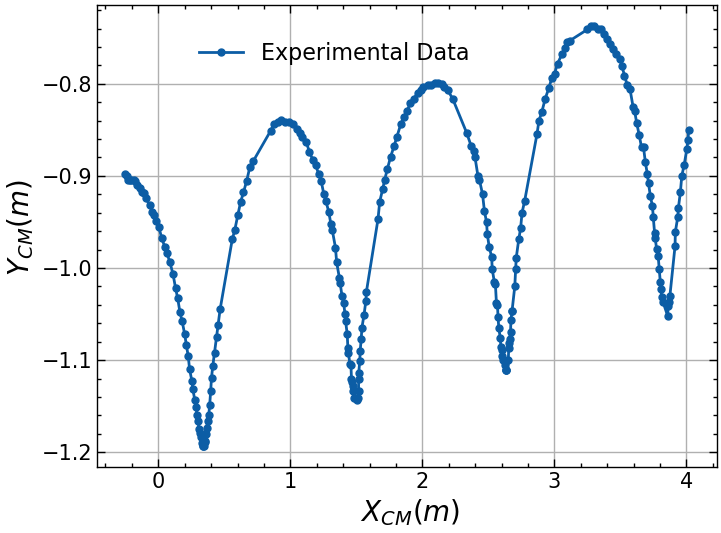

In [209]:
plt.plot(t3["x"], t3["y"], '-o', label="Experimental Data", markersize = 5)
plt.xlabel(r' $X_{CM}(m)$', fontsize = 20)
plt.ylabel(r'  $Y_{CM}(m)$', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.grid(True)
plt.legend(loc = (0.15,0.85))

#plt.ylim(0,1.8)
#plt.ylim(0,1.8)

plt.savefig('X_and_Y_component4444.png', dpi=1000) 
plt.show()